In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import missingno as msno

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

# Part 1- Data preprocessing

## read data

In [3]:
df_locations = pd.read_csv('./Locations.csv')
df_tanks = pd.read_csv('./Tanks.csv')
df_invoices = pd.read_csv('./Invoices.csv')
df_fuel1 = pd.read_csv('./Fuel_Level_Part_1.csv')
df_fuel2 = pd.read_csv('./Fuel_Level_Part_2.csv')

In [4]:
#df_invoices = df_invoices.dropna()

## merge and concat

In [5]:
df_invoices_clean = df_invoices.dropna()

df_info = pd.merge(df_invoices,df_locations,left_on='Invoice Gas Station Location',right_on = 'Gas Station Location')
df_info = pd.merge(df_info,df_tanks,left_on = 'Gas Station Location',right_on = 'Tank Location')
df_fuel2.columns = df_fuel1.columns
df_fuel = pd.concat([df_fuel1,df_fuel2]).reset_index()
df_fuel['Time stamp'] = pd.to_datetime(df_fuel['Time stamp'])

In [6]:
"""
display(df_invoices.head(2))
display(df_locations.head(2))
display(df_tanks.head(2))
display(df_info.head(2))
display(df_fuel.head(2))
"""

'\ndisplay(df_invoices.head(2))\ndisplay(df_locations.head(2))\ndisplay(df_tanks.head(2))\ndisplay(df_info.head(2))\ndisplay(df_fuel.head(2))\n'

In [7]:
df_info_clean = df_info.dropna()
df_fuel_clean = df_fuel.dropna()
df_fuel_clean.drop('index',axis = 1,inplace = True)
df_fuel_clean['Date'] = df_fuel_clean['Time stamp'].apply(lambda x: x.date())

In [8]:
df_fuel_clean

Tank ID  Fuel Level          Time stamp        Date
0          T 12     27161.0 2017-01-01 00:10:00  2017-01-01
1          T 12     27017.0 2017-01-01 00:25:00  2017-01-01
2          T 12     26934.0 2017-01-01 00:40:00  2017-01-01
4          T 12     26786.0 2017-01-01 00:55:00  2017-01-01
5          T 12     26748.0 2017-01-01 01:10:00  2017-01-01
...         ...         ...                 ...         ...
1859655    T 32     27619.0 2019-08-15 23:53:00  2019-08-15
1859656    T 22     31548.0 2019-08-15 23:57:00  2019-08-15
1859657    T 16     53492.0 2019-08-15 23:57:00  2019-08-15
1859658    T 18     27081.0 2019-08-15 23:57:00  2019-08-15
1859659    T 25     11815.0 2019-08-15 23:59:00  2019-08-15

[1859658 rows x 4 columns]

## Task 1

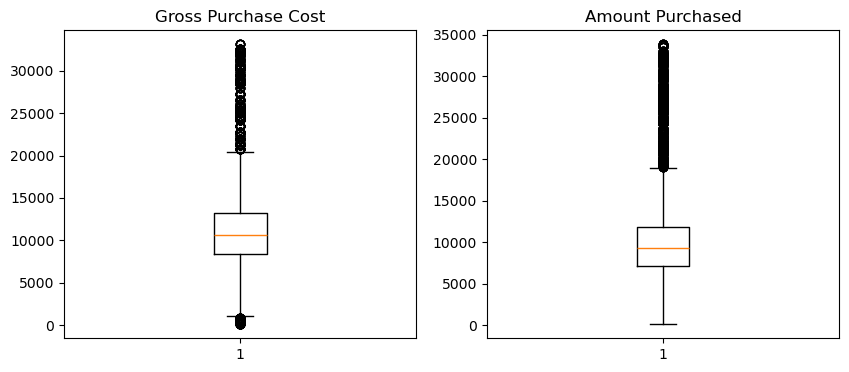

In [13]:
fig, ax = plt.subplots(1,2,figsize = (10,4))

ax[0].boxplot(df_info_clean['Gross Purchase Cost'])
ax[0].set(title = 'Gross Purchase Cost',
         xlabel = '',
         )
ax[1].boxplot(df_info_clean['Amount Purchased'])
ax[1].set(title = 'Amount Purchased')

plt.show()

#plt.boxplot()

### Task1-Q2
- Visualize Fuel Levels- 
Create visualizations for each tank to assess inventory trends over time
-  Identify stations wit 
effective inventory management practices and those at risk of stockouts.

## `pip install ipympl` before running the following cell

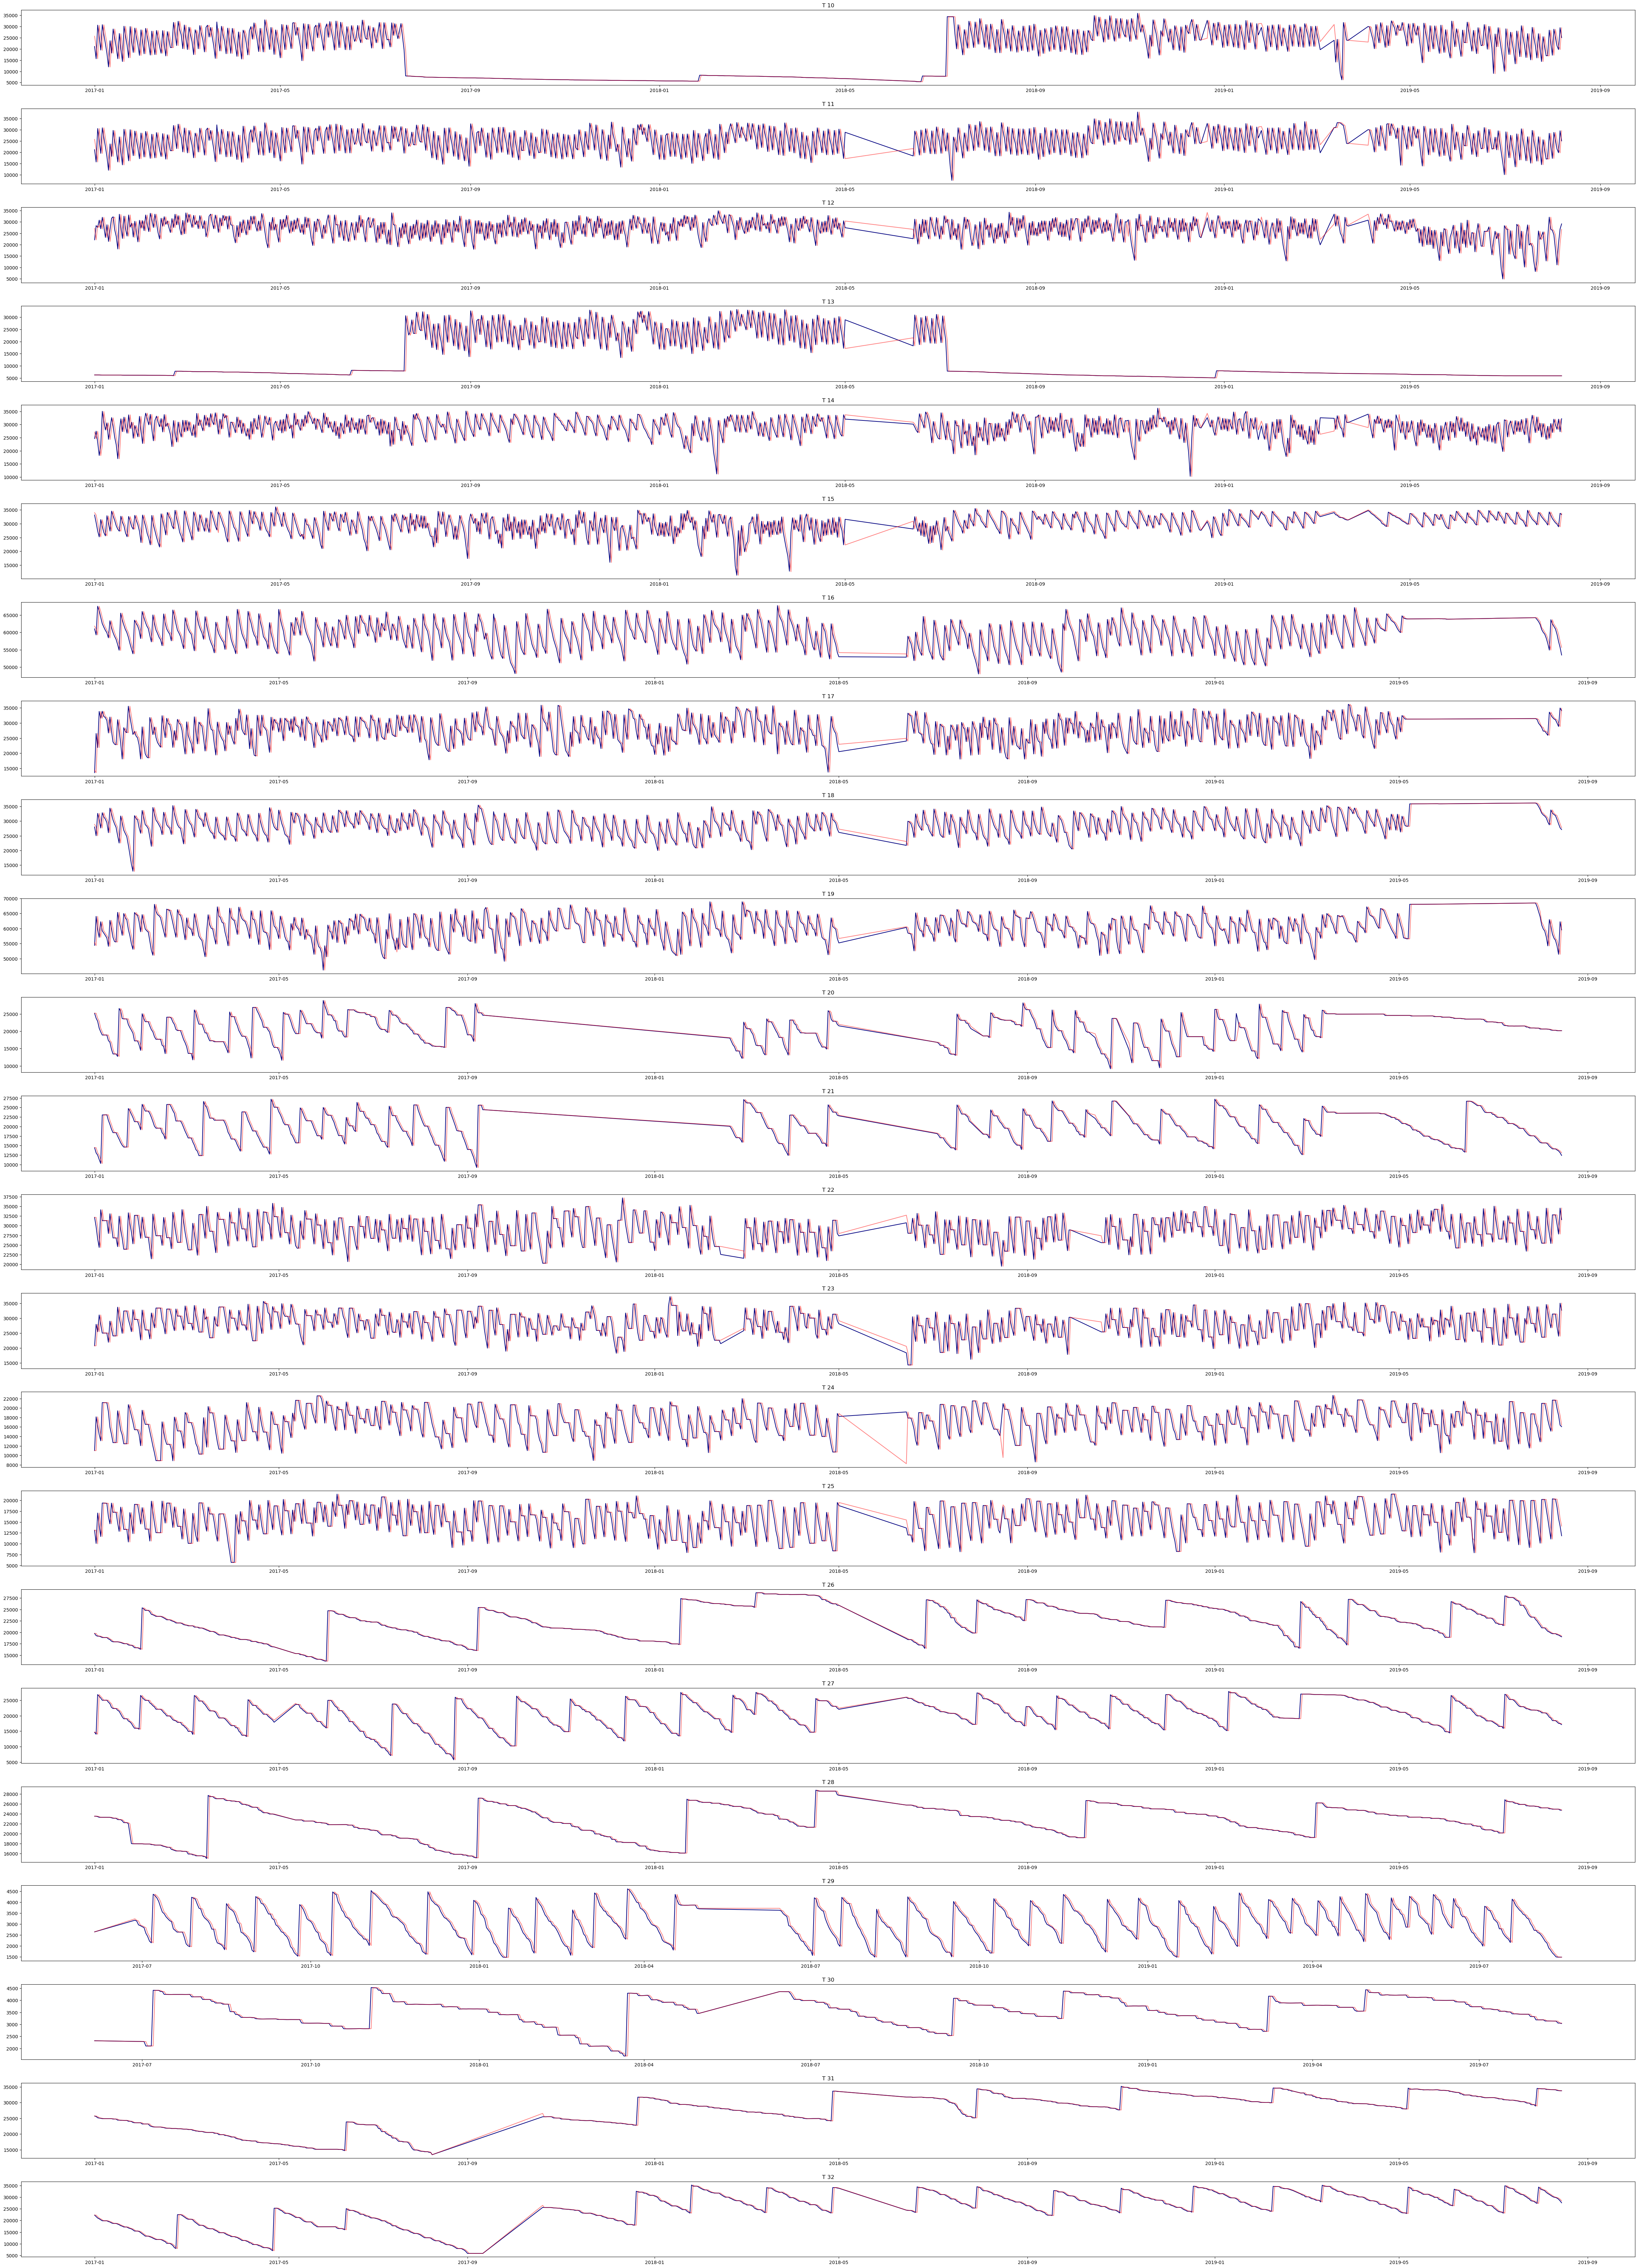

In [15]:
Q1_visualize_fuellevel = df_fuel_clean[['Tank ID', 'Fuel Level','Date']].groupby(['Tank ID','Date']).mean().reset_index()
number_of_tanks = Q1_visualize_fuellevel['Tank ID'].nunique()

import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(number_of_tanks,1,figsize = (50,3*number_of_tanks))
fig.tight_layout(pad=3)
"""
for i,tankid in enumerate(Q1_visualize_fuellevel['Tank ID'].unique()):
    
    df_needed = Q1_visualize_fuellevel[Q1_visualize_fuellevel['Tank ID'] == tankid]
    ax[i].plot(df_needed['Date'],df_needed['Fuel Level'])
    ax[i].set(title = tankid)
    del df_needed
"""
for i,tankid in enumerate(Q1_visualize_fuellevel['Tank ID'].unique()):
    df_lastday = df_fuel_clean.loc[df_fuel_clean[['Tank ID','Date']].drop_duplicates(keep ='last').index]
    df_lastday = df_lastday[df_lastday['Tank ID'] == tankid]
    ax[i].plot(df_lastday['Date'],df_lastday['Fuel Level'],color = 'navy')
    ax[i].set(title = tankid)

    df_firstday = df_fuel_clean.loc[df_fuel_clean[['Tank ID','Date']].drop_duplicates(keep ='first').index]
    df_firstday = df_firstday[df_firstday['Tank ID'] == tankid]
    ax[i].plot(df_firstday['Date'],df_firstday['Fuel Level'],color = 'red',alpha = 0.5)
    ax[i].set(title = tankid)

    del df_firstday
    del df_lastday

#fig.savefig('./Fuel_Level.png',dpi = 500)

#### According to the charts above, 
#### `T18 T19 T20 T21 T26 T27 T28 T29 T30 T31 T32` are tanks with effective inventory management
#### `T11 T13 T15 T24` are tanks at risk of stockouts

## Task1-Question 3

Quantify Current Performance
- `
Analyze the Invoices.csv dataset to evaluate current purchasing patterns`
- ` Calculate cost saving 
achieved via discounts for stations 1`8.

In [17]:
df_invoices_clean['Invoice Date'] = pd.to_datetime(df_invoices_clean['Invoice Date'])

In [24]:
## Discount Level of each purchase

def discountlevel(amount_purchased):
    if amount_purchased < 15000:
        return 0
    elif amount_purchased < 25000:
        return 2
    elif amount_purchased < 40000:
        return 3
    else:
        return 4
df_invoices_clean['Discount Level'] = df_invoices_clean['Amount Purchased'].apply(lambda x: discountlevel(x))
df_invoices_clean['Total Savings'] = df_invoices['Amount Purchased'] * df_invoices_clean['Discount Level']

## Cost Saving Achieved for each station
display(df_invoices_clean[['Invoice Gas Station Location','Total Savings']].groupby('Invoice Gas Station Location').sum().reset_index())

Invoice Gas Station Location  Total Savings
0                             1   1.905874e+07
1                             2   1.029632e+06
2                             3   1.955051e+05
3                             4   3.433667e+04
4                             5   0.000000e+00
5                             6   1.461895e+05
6                             7   0.000000e+00
7                             8   1.335396e+05

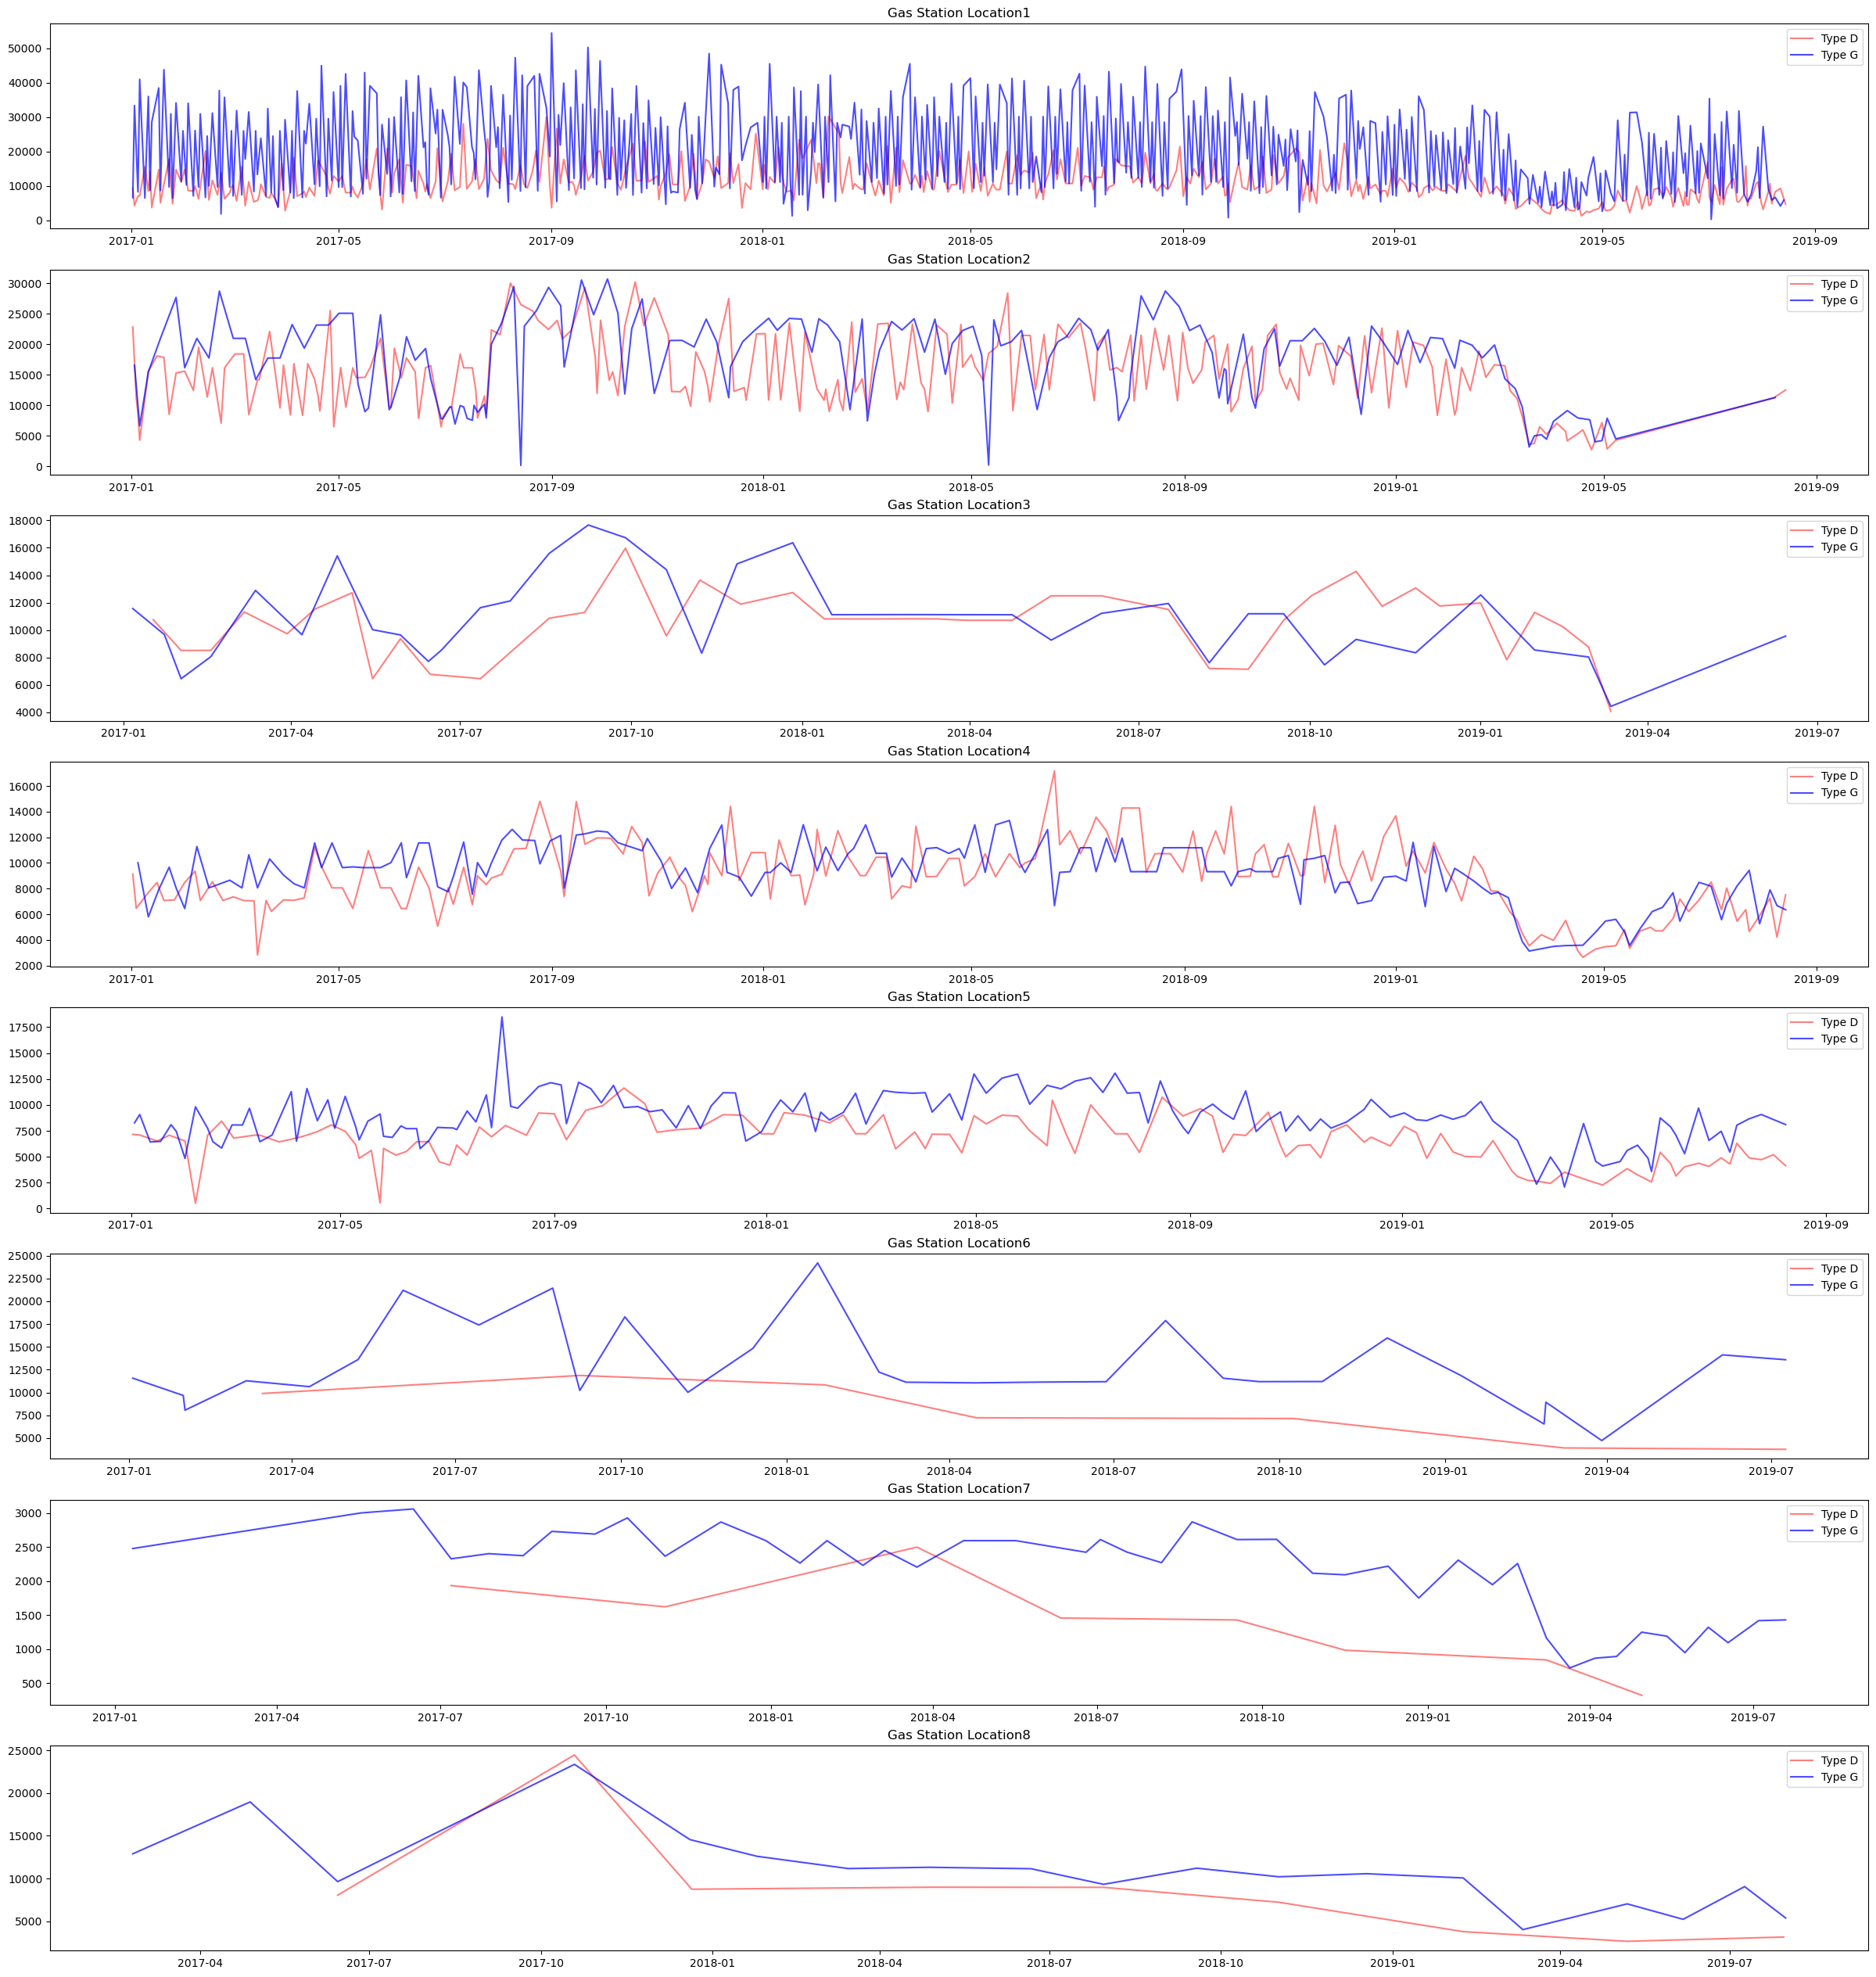

In [46]:
## Visualize the purchase pattern for each station

df_t1q3 = df_invoices_clean.groupby(['Invoice Gas Station Location','Invoice Date','Fuel Type']).sum().drop(['Invoice ID','Discount Level','Total Savings'],axis = 1).reset_index()
nbr_locations = df_t1q3['Invoice Gas Station Location'].nunique()

fig,ax = plt.subplots(nbr_locations,1,figsize = (30,4*nbr_locations))

for i,gasloc in enumerate(df_t2q3['Invoice Gas Station Location'].unique()):
    df_needed = df_t1q3[df_t1q3['Invoice Gas Station Location'] == gasloc]
    df_needed_d = df_needed[df_needed['Fuel Type'] == 'D']
    df_needed_g = df_needed[df_needed['Fuel Type'] == 'G']

    ax[i].plot(df_needed_d['Invoice Date'],df_needed_d['Amount Purchased'],color = 'r',alpha = 0.5,label = 'Type D')
    ax[i].plot(df_needed_g['Invoice Date'],df_needed_g['Amount Purchased'],color = 'b',alpha = 0.7,label = 'Type G')
    ax[i].set(title = 'Gas Station Location' + str(gasloc))
    ax[i].legend()
    

#### Charts above visualize the purchase pattern and trend of different Gas type at different Location

# Task 2- Question1
- Use the total tank capacity for each location and fuel type to determine the highest 
applicable discount rate

In [164]:
df_t2q1 = df_tanks.drop(['Tank ID','Tank Number'],axis = 1).groupby(['Tank Location','Tank Type']).sum().reset_index()
df_t2q1['Discount Level'] = df_t2q1['Tank Capacity'].apply(lambda x: discountlevel(x))
print('The total tank capacity for each location and fuel type as well as the highest applicable discount is as below:')
print('\n')
display(df_t2q1)

The total tank capacity for each location and fuel type as well as the highest applicable discount is as below:




Tank Location Tank Type  Tank Capacity  Discount Level
0               1         D          80000               4
1               1         P          40000               4
2               1         U         120000               4
3               2         D         110000               4
4               2         U         110000               4
5               3         D          30000               3
6               3         U          30000               3
7               4         D          40000               4
8               4         U          40000               4
9               5         D          25000               3
10              5         U          25000               3
11              6         D          30000               3
12              6         U          60000               4
13              7         D           5000               0
14              7         U           5000               0
15              8         D          40000               4
16              8         U          40000               4

# Task2-Question 2
- o Calculate a 7-day inventory threshold based on the average daily consumption for ea h
location and fuel type

In [197]:
df_t2q2 = pd.merge(df_fuel_clean,df_tanks, on = 'Tank ID', how = 'left')
def fueltype(x):
    if x in ['U','P']:
        return 'G'
    else:
        return x
df_t2q2['Fuel Type'] = df_t2q2['Tank Type'].apply(lambda x: fueltype(x))

daily_inventory = (
    df_t2q2.groupby(['Date', 'Tank Location', 'Fuel Type'])
    .agg(Start_Level=('Fuel Level', 'max'), End_Level=('Fuel Level', 'min'))
    .reset_index()
)
daily_inventory['Daily_consumption'] = daily_inventory['Start_Level'] - daily_inventory['End_Level']

average_daily_consumption = (
    daily_inventory.groupby(['Tank Location', 'Fuel Type'])['Daily_consumption']
    .mean()
    .reset_index()
    .rename(columns={'Daily_consumption': 'Average Daily Consumption'})
)

average_daily_consumption['7-Day Inventory Threshold'] = (
    average_daily_consumption['Average Daily Consumption'] * 7
)

display(average_daily_consumption[['Tank Location','Fuel Type','7-Day Inventory Threshold']])

Tank Location Fuel Type  7-Day Inventory Threshold
0               1         D               68762.920635
1               1         G              179040.690476
2               2         D              255319.539387
3               2         G              234252.426696
4               3         D                6239.310585
5               3         G                7084.701950
6               4         D               25203.790011
7               4         G               22844.480136
8               5         D               13409.607886
9               5         G               19015.243154
10              6         D                 981.258602
11              6         G               30733.154273
12              7         D                 237.449118
13              7         G                1705.786974
14              8         D                1130.454112
15              8         G                3372.659404

In [192]:
daily_inventory.sort_values(by = ['Tank Location','Fuel Type','Date'])

threshold_dict = {}
for i,tankloc in enumerate(daily_inventory['Tank Location'].unique()):
    threshold_dict[str(tankloc)] = {}
    
    for ftype in daily_inventory['Fuel Type'].unique():
        df_needed = daily_inventory[(daily_inventory['Fuel Type'] == ftype) & (daily_inventory['Tank Location'] == tankloc)]
        df_needed['7-day-diff'] = df_needed['Daily_consumption'].diff(7)
        
        maxdiff = df_needed['7-day-diff'].max()
        threshold_dict[str(tankloc)][ftype] = maxdiff
        
df_threshold = pd.DataFrame(threshold_dict).T.sort_index().reset_index().rename({'index':'Tank Location'},axis = 1)

In [196]:
print('7-day threshold of each tank location and fuel type are in table below: \n')
display(df_threshold)

7-day threshold of each tank location and fuel type are in table below: 



Tank Location        D        G
0             1  20003.0  12429.0
1             2  22054.0  21510.0
2             3  15819.0  15009.0
3             4  18768.0  11742.0
4             5  10462.0  12140.0
5             6  13033.0  11626.0
6             7   2702.0   2858.0
7             8   9494.0  18412.0

# Task 3

In [ ]:
df_invoices = pd.read_csv('./Invoices.csv')
df_invoices['Invoice Date'] = pd.to_datetime(df_invoices['Invoice Date'])
df_invoices['Day of Week'] = df_invoices['Invoice Date'].dt.strftime('%A')
display(df_invoices)

In [ ]:
#计算每次采购的油价
df_invoices['Price per Liter'] = df_invoices['Gross Purchase Cost'] / df_invoices['Amount Purchased']
print(df_invoices)

In [ ]:
# 2. 按星期几分组，计算平均油价
avg_price_per_day = df_invoices.groupby('Day of Week')['Price per Liter'].mean()
display(avg_price_per_day)

In [ ]:
# 重新排序星期顺序
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_price_per_day = avg_price_per_day.reindex(days_order)

In [ ]:
# 3. 可视化：平均油价和分布情况
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_day.index, y=avg_price_per_day.values)
plt.title('Average Price per Liter by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price per Liter')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 箱型图展示油价分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Price per Liter', data=df_invoices, order=days_order)
plt.title('Price per Liter Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price per Liter')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. 计算额外节省成本
# 找到最低油价和对应的星期
best_day = avg_price_per_day.idxmin()
lowest_price = avg_price_per_day.min()


In [ ]:
# 实际总成本
actual_cost = (df_invoices['Amount Purchased'] * df_invoices['Price per Liter']).sum()


In [ ]:
# 假设所有采购在最低油价日进行
total_volume = df_invoices['Amount Purchased'].sum()
hypothetical_cost = total_volume * lowest_price

In [ ]:
# 计算节省
savings = actual_cost - hypothetical_cost


In [ ]:
# 输出结果
print(f"The best day for fuel orders is: {best_day}")
print(f"Lowest average price per liter: {lowest_price:.2f}")
print(f"Potential savings if all purchases were made on {best_day}: ${savings:.2f}")

# Task 4